In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
updated_data = pd.read_csv("Fitness_trackers.csv", thousands=',')
updated_data.head()


,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days),Reviews
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14,NaN
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14,NaN
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14,NaN
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7,NaN


In [4]:
#data preparation stage

In [5]:
updated_data.drop(['Reviews'], axis=1, inplace=True)
updated_data.head()

,Brand Name,Device Type,Model Name,Color,Selling Price,Original Price,Display,Rating (Out of 5),Strap Material,Average Battery Life (in days)
0,Xiaomi,FitnessBand,Smart Band 5,Black,2499,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14
1,Xiaomi,FitnessBand,Smart Band 4,Black,2099,2499,AMOLED Display,4.2,Thermoplastic polyurethane,14
2,Xiaomi,FitnessBand,HMSH01GE,Black,1722,2099,LCD Display,3.5,Leather,14
3,Xiaomi,FitnessBand,Smart Band 5,Black,2469,2999,AMOLED Display,4.1,Thermoplastic polyurethane,14
4,Xiaomi,FitnessBand,Band 3,Black,1799,2199,OLED Display,4.3,Plastic,7


In [6]:
updated_data.isna().any()

Brand Name                        False
Device Type                       False
Model Name                        False
Color                             False
Selling Price                     False
Original Price                    False
Display                           False
Rating (Out of 5)                  True
Strap Material                    False
Average Battery Life (in days)    False
dtype: bool

In [7]:
updated_data['Rating (Out of 5)'].fillna(0,inplace=True)
updated_data.isna().any()

Brand Name                        False
Device Type                       False
Model Name                        False
Color                             False
Selling Price                     False
Original Price                    False
Display                           False
Rating (Out of 5)                 False
Strap Material                    False
Average Battery Life (in days)    False
dtype: bool

In [8]:
#Obtain basic information about the data.

In [9]:
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565 entries, 0 to 564
Data columns (total 10 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Brand Name                      565 non-null    object 
 1   Device Type                     565 non-null    object 
 2   Model Name                      565 non-null    object 
 3   Color                           565 non-null    object 
 4   Selling Price                   565 non-null    int64  
 5   Original Price                  565 non-null    int64  
 6   Display                         565 non-null    object 
 7   Rating (Out of 5)               565 non-null    float64
 8   Strap Material                  565 non-null    object 
 9   Average Battery Life (in days)  565 non-null    int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 44.3+ KB


In [10]:
updated_data.describe()

,Selling Price,Original Price,Rating (Out of 5),Average Battery Life (in days)
count,565.000000,565.000000,565.000000,565.000000
mean,22110.373451,25365.361062,3.848142,9.026549
std,19914.926066,20384.028759,1.269186,7.868670
min,1195.000000,1599.000000,0.000000,1.000000
25%,8990.000000,12999.000000,3.900000,2.000000
50%,15995.000000,19995.000000,4.200000,7.000000
75%,29900.000000,32900.000000,4.500000,14.000000
max,122090.000000,122090.000000,5.000000,45.000000


In [ ]:
#Top 5 company 

In [11]:
updated_data["Brand Name"].groupby(updated_data["Brand Name"]).count().sort_values(ascending=False).iloc[:5]

Brand Name
FOSSIL      133
GARMIN      101
APPLE        86
FitBit       51
SAMSUNG      48
Name: Brand Name, dtype: int64

<AxesSubplot:xlabel='count', ylabel='Brand Name'>

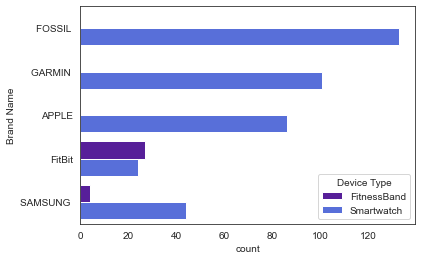

In [12]:
sns.set_style("white")
sns.countplot(y="Brand Name", hue="Device Type", data=updated_data, palette=["#560bad","#4361EE"], order=updated_data["Brand Name"].value_counts().iloc[:5].index)

In [13]:
#Are fitness trackers with highest ratings are they more expensive?

In [14]:
round(updated_data.groupby("Brand Name")["Rating (Out of 5)"].mean().sort_values(ascending=False).iloc[:10],1)

Brand Name
APPLE       4.5
OnePlus     4.3
FOSSIL      4.2
SAMSUNG     4.2
Honor       4.2
FitBit      4.2
Xiaomi      4.2
Huawei      4.2
huami       4.2
realme      4.1
Name: Rating (Out of 5), dtype: float64

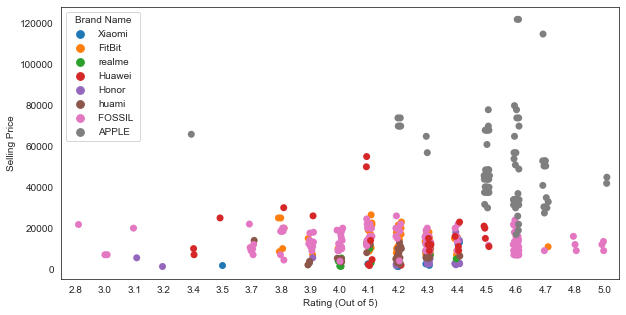

In [15]:
list = ["realme","Honor","FOSSIL ","SAMSUNG","OnePlus","FitBit","Xiaomi","Huawei","huami","APPLE"]
series = updated_data["Brand Name"].isin(list)

df_f = updated_data[series]
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.stripplot(x="Rating (Out of 5)", y="Selling Price", data=df_f, hue="Brand Name", size=7, marker="o")

In [16]:
#Common color

<AxesSubplot:xlabel='count', ylabel='Color'>

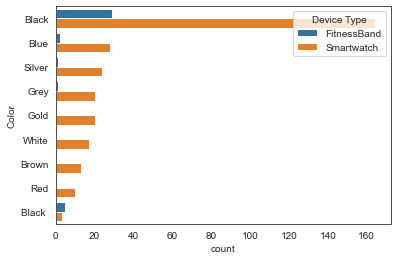

In [28]:
sns.countplot(y="Color", hue="Device Type", data=updated_data,
             order=updated_data["Color"].value_counts().iloc[:9].index)

In [18]:
#Does expensive fitness trackers products have a better battery life?

In [19]:
round(updated_data.groupby("Brand Name")["Average Battery Life (in days)"].mean(),0).sort_values(ascending=False)

Brand Name
GARMIN      17.0
huami       16.0
Oppo        14.0
Honor       12.0
Xiaomi      12.0
SAMSUNG     12.0
Huawei      11.0
realme      10.0
OnePlus      9.0
boAt         8.0
FitBit       7.0
GOQii        7.0
LAVA         7.0
Noise        7.0
LCARE        6.0
Fastrack     6.0
Noise        5.0
FOSSIL       5.0
Infinix      4.0
APPLE        1.0
Name: Average Battery Life (in days), dtype: float64

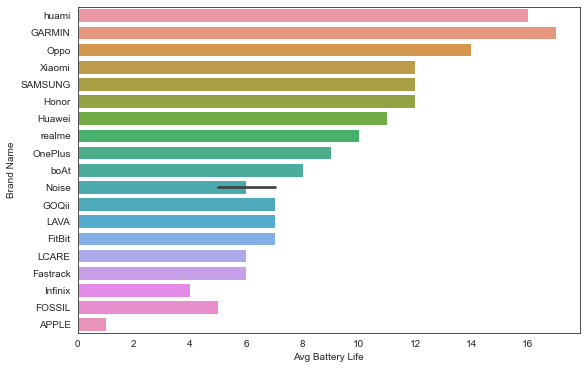

In [24]:
data={"Brand Name":["huami","GARMIN","Oppo","Xiaomi","SAMSUNG","Honor","Huawei","realme","OnePlus","boAt","Noise","GOQii","LAVA","FitBit","LCARE","Fastrack","Noise","Infinix","FOSSIL","APPLE"],
      "Avg Battery Life":[16.0,17.0,14.0,12.0,12.0,12.0,11.0,10.0,9.0,8.0,7.0,7.0,7.0,7.0,6.0,6.0,5.0,4.0,5.0,1.0]}


df_battery = pd.DataFrame(data)

sns.set_style("white")
plt.figure(figsize=(9, 6))

ax = sns.barplot(x="Avg Battery Life", y="Brand Name", data=df_battery)